# Name: Billy Lu

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")

#Read in emailSpamCollection
df = pd.read_csv('SpamCollection', sep='\t')
#Dataframe does not have colum labels - add them
df.columns = ['Label','email']

In [2]:
#display first 5 rows of data
df.head()

,Label,email
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [3]:
#Pre-process and clean up dataset by removing trailing white spaces, converting to lower case etc.
#it also puts each email text into a list of words that is stored in the email column of the dataframe
#this is the code you'll need when you read in the test data
email_data_clean = df.copy()
email_data_clean['email'] = email_data_clean['email'].str.replace('\W+', ' ').str.replace('\s+', ' ').str.strip()
email_data_clean['email'] = email_data_clean['email'].str.lower()
email_data_clean['email'] = email_data_clean['email'].str.split()
le = preprocessing.LabelEncoder()

#change label from ham/spam to 0/1
email_data_clean['Label'] = le.fit_transform(email_data_clean['Label'])

#View new data
email_data_clean.head()

,Label,email
0,0,"[ok, lar, joking, wif, u, oni]"
1,1,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,0,"[u, dun, say, so, early, hor, u, c, already, t..."
3,0,"[nah, i, don, t, think, he, goes, to, usf, he,..."
4,1,"[freemsg, hey, there, darling, it, s, been, 3,..."


In [4]:
#get nparray of all words in email
np_sms = email_data_clean.iloc[:,1].values
#store them in vocabulary 
vocabulary = list(set(np_sms.sum()))
vocabulary
#these are all the words in the dataset
#8751 words 
len(vocabulary)

8751

In [5]:
email_data_clean['Label'].value_counts()

0    4824
1     747
Name: Label, dtype: int64

# Visualize the Data

### Bar Chart with Frequency of ham and spam

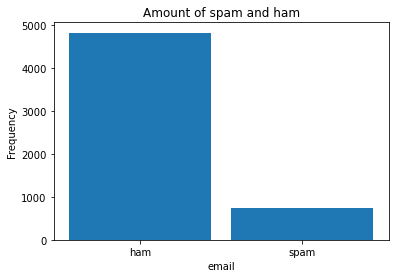

In [6]:
counts = email_data_clean['Label'].value_counts()
plt.xticks([0,.4], ['ham','spam'])
plt.xlabel("email")
plt.ylabel("Frequency")
plt.title("Amount of spam and ham")
plt.bar([0,.4], height=counts, width = .35)
plt.show()

### Bar Chart of 10 most frequent words found in whole Dataset

<AxesSubplot:xlabel='Word'>

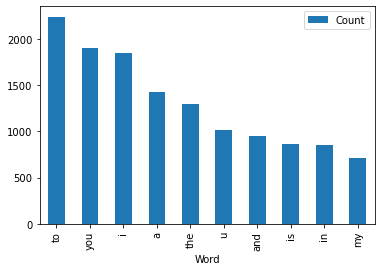

In [7]:
import collections

wordcount = {}
list =  df['email'].tolist()
filtered_list = ("").join(list)
filtered_list = filtered_list.lower()
filtered_list = filtered_list.split()

for word in filtered_list:
    word = word.replace(".", "")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace(")", "")
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1
        
word_counter = collections.Counter(wordcount)


lst = word_counter.most_common(10)
data = pd.DataFrame(lst, columns = ['Word', 'Count'])
data.plot.bar(x='Word',y='Count')

### Bar Chart of 10 most frequent words found in ham

<AxesSubplot:xlabel='Word'>

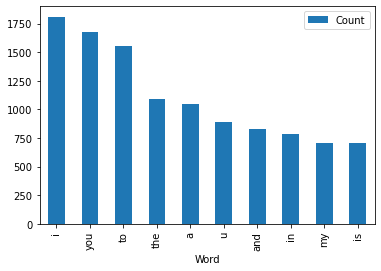

In [8]:
wordcount = {}
df_ham =  df[df.Label=='ham']
ham_list = df_ham['email'].tolist()
filtered_ham_list = ("").join(ham_list)
filtered_ham_list = filtered_ham_list.lower()
filtered_ham_list = filtered_ham_list.split()


for word in filtered_ham_list:
    word = word.replace(".", "")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace(")", "")
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1
        
word_counter = collections.Counter(wordcount)


lst = word_counter.most_common(10)
data = pd.DataFrame(lst, columns = ['Word', 'Count'])
data.plot.bar(x='Word',y='Count')

### Bar Chart of 10 most frequent words found in Spam


<AxesSubplot:xlabel='Word'>

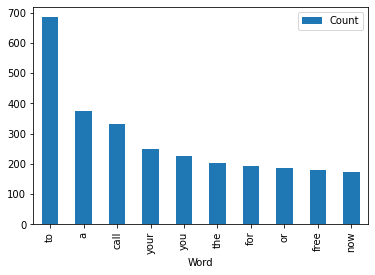

In [9]:
wordcount = {}
df_spam =  df[df.Label=='spam']
spam_list = df_spam['email'].tolist()
filtered_spam_list = ("").join(spam_list)
filtered_spam_list = filtered_spam_list.lower()
filtered_spam_list = filtered_spam_list.split()


for word in filtered_spam_list:
    word = word.replace(".", "")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace(")", "")
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1
        
word_counter = collections.Counter(wordcount)


lst = word_counter.most_common(10)
data = pd.DataFrame(lst, columns = ['Word', 'Count'])
data.plot.bar(x='Word',y='Count')

In [10]:
#create new dataframe with each word as a feature and the # of times the word occurs as value
df_voc = pd.DataFrame([
    [row.count(word) for word in vocabulary]
    for row in email_data_clean.iloc[:,1].values], columns=vocabulary)
 
#use this as your training data
df_voc_train = df_voc.copy()

#Add the label back to the dataframe
#Use this dataframe if you need the label to create charts
df_voc['Label'] = email_data_clean.loc[:,'Label']

#use the df_voc_train to train your classifiers
df_voc_train.head()

,ak,training,apeshit,slow,bailiff,cola,million,odalebeku,stupid,mode,...,blowing,09099725823,0870753331018,abuse,bec,sundayish,parco,08081263000,7250i,trusting
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train Classifier on whole sample

In [11]:
bernoulli = BernoulliNB()
multinomial = MultinomialNB()
tree = DecisionTreeClassifier()
perceptron = Perceptron()
random_forest = RandomForestClassifier()

x = df_voc_train
y = email_data_clean['Label']

bernoulli.fit(x, y)
multinomial.fit(x, y)
tree.fit(x, y)
perceptron.fit(x, y)
random_forest.fit(x, y)

cv_pred_bernoulli = cross_val_predict(bernoulli,x , y , cv = 5)
cv_pred_multinomial = cross_val_predict(multinomial,x , y , cv = 5)
cv_pred_tree = cross_val_predict(tree ,x , y , cv = 5)
cv_pred_perceptron = cross_val_predict(perceptron,x , y , cv = 5)
cv_pred_random_forest = cross_val_predict(random_forest ,x , y , cv = 5)

cv_score_bernoulli = cross_val_score(bernoulli, x, y , cv=5)
cv_score_multinomial = cross_val_score(multinomial, x, y , cv=5)
cv_score_tree = cross_val_score(tree, x, y , cv=5)
cv_score_perceptron = cross_val_score(perceptron, x, y , cv=5)
cv_score_random_forest = cross_val_score(random_forest, x, y , cv=5)

cv_avg_bernoulli = np.mean(cv_score_bernoulli)
cv_avg_multinomial = np.mean(cv_score_multinomial)
cv_avg_tree = np.mean(cv_score_tree)
cv_avg_perceptron = np.mean(cv_score_perceptron)
cv_avg_random_forest = np.mean(cv_score_random_forest)

# print("Cross validation accuracy BernoulliNB : ",cv_score_bernoulli)
# print("Cross validiation average score BernoulliNB: ",cv_avg_bernoulli)
# print(confusion_matrix(y, cv_pred_bernoulli))

# print("Cross validation accuracy MultinomialNB : ",cv_score_multinomial)
# print("Cross validiation average score MultinomialNB: ",cv_avg_multinomial)
# print(confusion_matrix(y, cv_pred_multinomial))

# print("Cross validation accuracy DecisionTree : ",cv_score_tree)
# print("Cross validiation average score DecisionTree: ",cv_avg_tree)
# print(confusion_matrix(y, cv_pred_tree))

# print("Cross validation accuracy Perceptron : ",cv_score_perceptron)
# print("Cross validiation average score Perceptron: ",cv_avg_perceptron)
# print(confusion_matrix(y, cv_pred_perceptron))

# print("Cross validation accuracy RandomForest : ",cv_score_random_forest)
# print("Cross validiation average score RandomForest: ",cv_avg_random_forest)
# print(confusion_matrix(y, cv_pred_random_forest))

test = [[precision_score(y, cv_pred_bernoulli),recall_score(y, cv_pred_bernoulli),accuracy_score(y, cv_pred_bernoulli)], 
        [precision_score(y, cv_pred_multinomial),recall_score(y, cv_pred_multinomial),accuracy_score(y, cv_pred_multinomial)],
        [precision_score(y, cv_pred_tree),recall_score(y, cv_pred_tree),accuracy_score(y, cv_pred_tree)],
        [precision_score(y, cv_pred_perceptron),recall_score(y, cv_pred_perceptron),accuracy_score(y, cv_pred_perceptron)],
        [precision_score(y, cv_pred_random_forest),recall_score(y, cv_pred_random_forest),accuracy_score(y, cv_pred_random_forest)],

       ]
value = pd.DataFrame(test)
new_value = value.rename(columns = {0: 'Precision', 1: 'Recall', 2: 'CCR'}, index={0: 'BernoulliNB', 1: 'MultinomialNB', 2: 'DecisionTree', 3: 'Perceptron', 4: 'RandomForest'})
new_value

,Precision,Recall,CCR
BernoulliNB,0.980510,0.875502,0.980973
MultinomialNB,0.920676,0.947791,0.982050
DecisionTree,0.907173,0.863454,0.969844
Perceptron,0.982533,0.903614,0.984922
RandomForest,0.996700,0.808568,0.973972


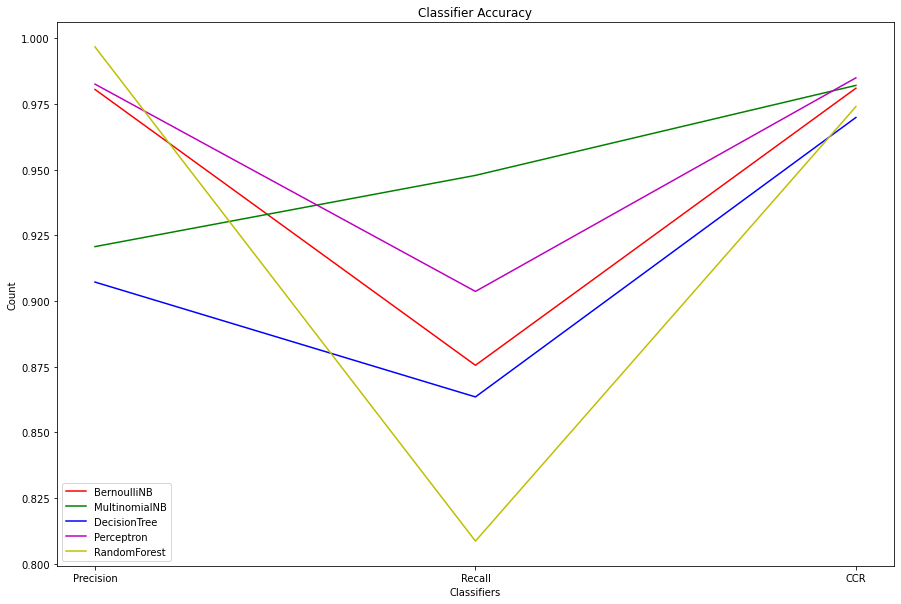

In [12]:
samples = np.array(['Precision', 'Recall', 'CCR'])
plt.figure(1, figsize=(15,10))
plt.plot(samples, new_value.iloc[0,:], 'r', label='BernoulliNB')
plt.plot(samples, new_value.iloc[1,:], 'g', label='MultinomialNB')
plt.plot(samples, new_value.iloc[2,:], 'b', label='DecisionTree')
plt.plot(samples, new_value.iloc[3,:], 'm', label='Perceptron')
plt.plot(samples, new_value.iloc[4,:], 'y', label='RandomForest')
plt.title("Classifier Accuracy")
plt.xlabel("Classifiers")
plt.ylabel("Count")
plt.legend()
plt.show()

## Train Classifier on 10% of Samples

In [13]:
sample_10 = df_voc.sample(frac=0.1, replace=True, random_state=1)

sample_10_train = sample_10.drop('Label', axis=1)
x = sample_10_train
y = sample_10.iloc[:,-1]

bernoulli.fit(x, y)
multinomial.fit(x, y)
tree.fit(x, y)
perceptron.fit(x, y)
random_forest.fit(x, y)

cv_pred_bernoulli = cross_val_predict(bernoulli,x , y , cv = 5)
cv_pred_multinomial = cross_val_predict(multinomial,x , y , cv = 5)
cv_pred_tree = cross_val_predict(tree ,x , y , cv = 5)
cv_pred_perceptron = cross_val_predict(perceptron,x , y , cv = 5)
cv_pred_random_forest = cross_val_predict(random_forest ,x , y , cv = 5)

cv_score_bernoulli = cross_val_score(bernoulli, x, y , cv=5)
cv_score_multinomial = cross_val_score(multinomial, x, y , cv=5)
cv_score_tree = cross_val_score(tree, x, y , cv=5)
cv_score_perceptron = cross_val_score(perceptron, x, y , cv=5)
cv_score_random_forest = cross_val_score(random_forest, x, y , cv=5)

cv_avg_bernoulli = np.mean(cv_score_bernoulli)
cv_avg_multinomial = np.mean(cv_score_multinomial)
cv_avg_tree = np.mean(cv_score_tree)
cv_avg_perceptron = np.mean(cv_score_perceptron)
cv_avg_random_forest = np.mean(cv_score_random_forest)

# print("Cross validation accuracy BernoulliNB : ",cv_score_bernoulli)
# print("Cross validiation average score BernoulliNB: ",cv_avg_bernoulli)
# print(confusion_matrix(y, cv_pred_bernoulli))

# print("Cross validation accuracy MultinomialNB : ",cv_score_multinomial)
# print("Cross validiation average score MultinomialNB: ",cv_avg_multinomial)
# print(confusion_matrix(y, cv_pred_multinomial))

# print("Cross validation accuracy DecisionTree : ",cv_score_tree)
# print("Cross validiation average score DecisionTree: ",cv_avg_tree)
# print(confusion_matrix(y, cv_pred_tree))

# print("Cross validation accuracy Perceptron : ",cv_score_perceptron)
# print("Cross validiation average score Perceptron: ",cv_avg_perceptron)
# print(confusion_matrix(y, cv_pred_perceptron))

# print("Cross validation accuracy RandomForest : ",cv_score_random_forest)
# print("Cross validiation average score RandomForest: ",cv_avg_random_forest)
# print(confusion_matrix(y, cv_pred_random_forest))

test = [[precision_score(y, cv_pred_bernoulli),recall_score(y, cv_pred_bernoulli),accuracy_score(y, cv_pred_bernoulli)], 
        [precision_score(y, cv_pred_multinomial),recall_score(y, cv_pred_multinomial),accuracy_score(y, cv_pred_multinomial)],
        [precision_score(y, cv_pred_tree),recall_score(y, cv_pred_tree),accuracy_score(y, cv_pred_tree)],
        [precision_score(y, cv_pred_perceptron),recall_score(y, cv_pred_perceptron),accuracy_score(y, cv_pred_perceptron)],
        [precision_score(y, cv_pred_random_forest),recall_score(y, cv_pred_random_forest),accuracy_score(y, cv_pred_random_forest)],

       ]
value = pd.DataFrame(test)
new_value = value.rename(columns = {0: 'Precision', 1: 'Recall', 2: 'CCR'}, index={0: 'BernoulliNB', 1: 'MultinomialNB', 2: 'DecisionTree', 3: 'Perceptron', 4: 'RandomForest'})
new_value

,Precision,Recall,CCR
BernoulliNB,0.000000,0.000000,0.877917
MultinomialNB,0.975610,0.588235,0.947935
DecisionTree,0.791667,0.838235,0.953321
Perceptron,0.913793,0.779412,0.964093
RandomForest,1.000000,0.397059,0.926391


## Train Classifier on 50% of Samples 

In [14]:
sample_50 = df_voc.sample(frac=0.5, replace=True, random_state=1)

sample_50_train = sample_50.drop('Label', axis=1)
x = sample_50_train
y = sample_50.iloc[:,-1]

bernoulli.fit(x, y)
multinomial.fit(x, y)
tree.fit(x, y)
perceptron.fit(x, y)
random_forest.fit(x, y)

cv_pred_bernoulli = cross_val_predict(bernoulli,x , y , cv = 5)
cv_pred_multinomial = cross_val_predict(multinomial,x , y , cv = 5)
cv_pred_tree = cross_val_predict(tree ,x , y , cv = 5)
cv_pred_perceptron = cross_val_predict(perceptron,x , y , cv = 5)
cv_pred_random_forest = cross_val_predict(random_forest ,x , y , cv = 5)

cv_score_bernoulli = cross_val_score(bernoulli, x, y , cv=5)
cv_score_multinomial = cross_val_score(multinomial, x, y , cv=5)
cv_score_tree = cross_val_score(tree, x, y , cv=5)
cv_score_perceptron = cross_val_score(perceptron, x, y , cv=5)
cv_score_random_forest = cross_val_score(random_forest, x, y , cv=5)

cv_avg_bernoulli = np.mean(cv_score_bernoulli)
cv_avg_multinomial = np.mean(cv_score_multinomial)
cv_avg_tree = np.mean(cv_score_tree)
cv_avg_perceptron = np.mean(cv_score_perceptron)
cv_avg_random_forest = np.mean(cv_score_random_forest)

# print("Cross validation accuracy BernoulliNB : ",cv_score_bernoulli)
# print("Cross validiation average score BernoulliNB: ",cv_avg_bernoulli)
# print(confusion_matrix(y, cv_pred_bernoulli))

# print("Cross validation accuracy MultinomialNB : ",cv_score_multinomial)
# print("Cross validiation average score MultinomialNB: ",cv_avg_multinomial)
# print(confusion_matrix(y, cv_pred_multinomial))

# print("Cross validation accuracy DecisionTree : ",cv_score_tree)
# print("Cross validiation average score DecisionTree: ",cv_avg_tree)
# print(confusion_matrix(y, cv_pred_tree))

# print("Cross validation accuracy Perceptron : ",cv_score_perceptron)
# print("Cross validiation average score Perceptron: ",cv_avg_perceptron)
# print(confusion_matrix(y, cv_pred_perceptron))

# print("Cross validation accuracy RandomForest : ",cv_score_random_forest)
# print("Cross validiation average score RandomForest: ",cv_avg_random_forest)
# print(confusion_matrix(y, cv_pred_random_forest))

test = [[precision_score(y, cv_pred_bernoulli),recall_score(y, cv_pred_bernoulli),accuracy_score(y, cv_pred_bernoulli)], 
        [precision_score(y, cv_pred_multinomial),recall_score(y, cv_pred_multinomial),accuracy_score(y, cv_pred_multinomial)],
        [precision_score(y, cv_pred_tree),recall_score(y, cv_pred_tree),accuracy_score(y, cv_pred_tree)],
        [precision_score(y, cv_pred_perceptron),recall_score(y, cv_pred_perceptron),accuracy_score(y, cv_pred_perceptron)],
        [precision_score(y, cv_pred_random_forest),recall_score(y, cv_pred_random_forest),accuracy_score(y, cv_pred_random_forest)],

       ]
value = pd.DataFrame(test)
new_value = value.rename(columns = {0: 'Precision', 1: 'Recall', 2: 'CCR'}, index={0: 'BernoulliNB', 1: 'MultinomialNB', 2: 'DecisionTree', 3: 'Perceptron', 4: 'RandomForest'})
new_value

,Precision,Recall,CCR
BernoulliNB,0.992157,0.727011,0.965183
MultinomialNB,0.947826,0.939655,0.986001
DecisionTree,0.927900,0.850575,0.973080
Perceptron,0.954683,0.908046,0.983130
RandomForest,0.996416,0.798851,0.974515


# Testing Your Trained Classifier

In [15]:
#Read in emailTestData
df_test = pd.read_csv('sh_500.csv')
df_test.columns = ['Label','email']
df_test.head()

,Label,email
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


### Clean dataset

In [16]:
email_test_data_clean = df_test.copy()
email_test_data_clean['email'] = email_test_data_clean['email'].str.replace('\W+', ' ').str.replace('\s+', ' ').str.strip()
email_test_data_clean['email'] = email_test_data_clean['email'].str.lower()
email_test_data_clean['email'] = email_test_data_clean['email'].str.split()
le = preprocessing.LabelEncoder()

#change label from ham/spam to 0/1
email_test_data_clean['Label'] = le.fit_transform(email_test_data_clean['Label'])

#View new data
email_test_data_clean.head()

,Label,email
0,0,"[subject, enron, methanol, meter, 988291, this..."
1,0,"[subject, hpl, nom, for, january, 9, 2001, see..."
2,0,"[subject, neon, retreat, ho, ho, ho, we, re, a..."
3,1,"[subject, photoshop, windows, office, cheap, m..."
4,0,"[subject, re, indian, springs, this, deal, is,..."


### Create vocabulary feature set

In [17]:
#create new dataframe with each word as a feature and the # of times the word occurs as value
df_voc = pd.DataFrame([
    [row.count(word) for word in vocabulary]
    for row in email_test_data_clean.iloc[:,1].values], columns=vocabulary)
 
#use this as your training data
df_voc_test = df_voc.copy()

#Add the label back to the dataframe
#Use this dataframe if you need the label to create charts
df_voc['Label'] = email_test_data_clean.loc[:,'Label']

#use the df_voc_train to train your classifiers
df_voc_test.head()

,ak,training,apeshit,slow,bailiff,cola,million,odalebeku,stupid,mode,...,blowing,09099725823,0870753331018,abuse,bec,sundayish,parco,08081263000,7250i,trusting
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Bar Chart of Number of Ham and Spam emails in Test Data 

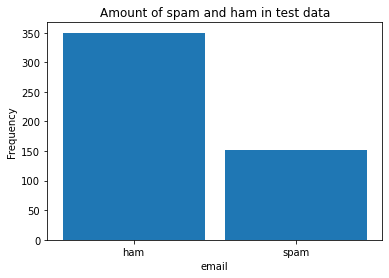

In [18]:
counts = email_test_data_clean['Label'].value_counts()
plt.xticks([0,.4], ['ham','spam'])
plt.xlabel("email")
plt.ylabel("Frequency")
plt.title("Amount of spam and ham in test data")
plt.bar([0,.4], height=counts, width = .35)
plt.show()

In [19]:
# bernoulli = BernoulliNB()
# multinomial = MultinomialNB()
# tree = DecisionTreeClassifier()
# perceptron = Perceptron()
# random_forest = RandomForestClassifier()

x = df_voc_test
y = email_test_data_clean['Label']

predicted_bernoulli = bernoulli.predict(x)
accuracy_bernoulli = accuracy_score(y, predicted_bernoulli)

predicted_multinomial = multinomial.predict(x)
accuracy_multinomial = accuracy_score(y, predicted_multinomial)

predicted_tree = tree.predict(x)
accuracy_tree = accuracy_score(y, predicted_tree)

predicted_perceptron = perceptron.predict(x)
accuracy_perceptron = accuracy_score(y, predicted_perceptron)

predicted_random_forest = random_forest.predict(x)
accuracy_random_forest = accuracy_score(y, predicted_random_forest)

test_accuracy = [[accuracy_bernoulli],
        [accuracy_multinomial],
        [accuracy_tree],
        [accuracy_perceptron],
        [accuracy_random_forest]
       ]

all_accuracy = pd.DataFrame(test_accuracy)
new_all_accuracy = all_accuracy.rename(columns = {0: 'Accuracy'}, index={0: 'BernoulliNB', 1: 'MultinomialNB', 2: 'DecisionTree', 3: 'Perceptron', 4: 'RandomForest'})
new_all_accuracy

,Accuracy
BernoulliNB,0.487026
MultinomialNB,0.485030
DecisionTree,0.734531
Perceptron,0.572854
RandomForest,0.704591


## Report 

1. Report on which classifier performed best. Are you surprised?
    - The classifier that performed best would be the MultinomialNB with precision of .920676, recall of .947791 and a CCR of .982050. Even though the precision and CCR are not the highest, the recall is. I am not surprised as Naive Bayes classifiers are a popular statistical technique used for e-mail filtering.
2. How much data is necessary to achieve good results from the classifier?
    - There is no set answer to how much data is necessary to achieve good results but more relevant training data seems to always help as the precision, recall and CCR of the classifiers trained on the whole dataset was better than that of 10% and 50%.
3. First, create a bar chart of the number of ham and spam emails. Is the test data similar to the training data?
    - The test data is similar in the the sense that the ration of ham to spam is similar to that of the training data. However, the test data has less data size than that of the training data.
4. How did they perform? If not well, why? What are some things you can do to improve the results? Do you think it would have done better if the training data had more spam samples?
    - My accuracy for the test did not perform as well as the training. The highest accuracy for the test was with the DecisionTree with an accuracy of .734531 which is lower than the training which gave a CCR of around .9 all around. The reason for this is that the distribution of data in the test set is very different from the one of the training set as we used the vocabularly found in the training data set. There could also be a potential factor that I overfitted the model as by definition, when training accuracy is higher than testing one has an overfit model. In essence, my model has learned particulars that helped it perform better in the training data that are not applicable to the testing data population and therefore result in worse performance. One solution to improve the results is to add more data to the training data as well as increasing k-fold validation as the purpose of k-fold is to help avoid overfitting the models.